# Part I - Investigate a Dataset (TMDb movie dataset)
## by (Mamadou Adama Diallo)

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset contains information about 10,000 movies collected from The Movie Database(TMDb), including user ratings and revenue. The questions that i will try to answer are: 
* what are the characteristics of the films that have a very good income?
* What is the genre of films that has a very good revenue?

<a id='wrangling'></a>
## Preliminary Wrangling
In this section we will load, explore and do some tranformation if necessary to prepare our data 

Let's import the python packages

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Load our Data into a pandas dataframe

In [2]:
# load the dataset 
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# High-level overview of data composition and shape
print(df.shape)
print(df.dtypes)
df.head(3)

(10866, 21)
id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


Let's print some information to see the types of our data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Here, were are going to print some informations like the mean, std, min, max values for the numerical variables

In [6]:
# Descriptive statistics for numeric variables
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Cleaning and Transformation the data

Is there any duplecated line?

In [7]:
# check if we have duplecated data
df.duplicated().sum()

1

We have one duplecated line, now we are going to delete it

In [8]:
#Drop the duplecated data
df.drop_duplicates(inplace=True)

In [9]:
#check columns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

Let's remove the columns that will not be used in case study

In [10]:
# I'm going to delete useless columns for my study
del_list = ['id', 'imdb_id', 'budget', 'revenue',
       'cast', 'homepage', 'director', 'tagline',
        'keywords','overview', 'runtime', 'release_date', 
            'production_companies']
df.drop(del_list, axis=1, inplace=True)

Are there any missing values?

In [11]:
# Check if there is still a missing values
df.isnull().sum()

popularity         0
original_title     0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

We find that, in the column genres there are 23 missing values in 10866 values.<br>
we are going to delete them (it's not the best practice, we have other options).

In [12]:
df.dropna(inplace=True)
df.isnull().sum()

popularity        0
original_title    0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [13]:
df.head(5)

,popularity,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In the genres column we have type of movies serparated by pipe | (Action|Adventure|Science Fiction|Thriller).
So, we need some transformation on this column.
I'll take the first value of each record and create new column genre_movie.

In [14]:
''' I'm going to tranform genres column
    I'll take the first value and create new column genre_movie
    with the values i take
'''
genre_list = []
for s in df['genres']:
    s = s.split('|')
    genre_list.append(s[0])
# create new  column  genre_movie
df['genre_movie'] = genre_list

In [15]:
df.head(5)

,popularity,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_movie
0,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,13.112507,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,11.173104,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,9.335014,Furious 7,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,Action


### What is the structure of your dataset?

There are 10842 rows in the dataset with 9 features (popularity	, original_title, genres, vote_count, vote_average,	release_year, budget_adj, revenue_adj, genre_movie).

### What is/are the main feature(s) of interest in your dataset?

The main of features interest are revenue_adj, budget_adj and popularity

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think that the vote_count, vote_average and genre_movie will have the strongest effect

<a id='eda'></a>
## Exploratory Data Analysis

### Univariate Exploration

We are printing  The mean of Budget, Vote average and Revenue

In [16]:
print("The mean of Budget:", df['budget_adj'].mean())
print("The mean of Vote average:", df['vote_average'].mean())
print("The mean of Revenue:", df['revenue_adj'].mean())

The mean of Budget: 17587121.438262865
The mean of Vote average: 5.974063825862387
The mean of Revenue: 51477974.9225074


In [17]:
df['genre_movie'].value_counts()

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               380
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Foreign               9
Name: genre_movie, dtype: int64

Creat a function to customize plots

In [18]:
def set_labels(x, y, t):
    
    """
    args:
    t (str): title of the plot
    y (str): y label of the plot
    x (str): x label of the plot
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

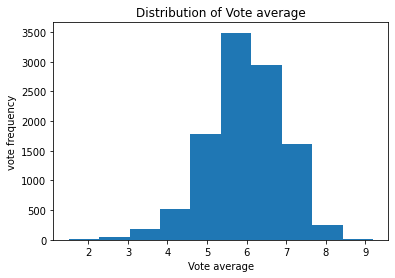

In [19]:
df['vote_average'].plot(kind='hist')
#  call our defined function set_label
set_labels("Vote average", "vote frequency", "Distribution of Vote average")

We notice that the votes are around 6

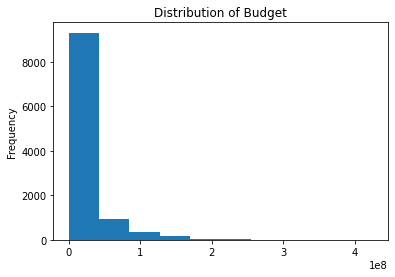

In [20]:
df['budget_adj'].plot(kind='hist')
plt.title("Distribution of Budget")
plt.show()

We notice a big discrepancy between the maximum value and the other values

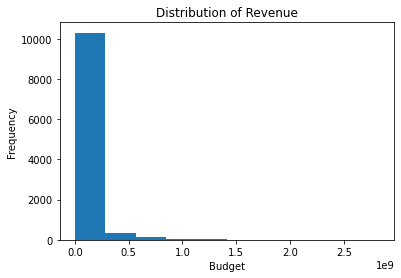

In [21]:
df['revenue_adj'].plot(kind='hist')
plt.xlabel("Budget")
#plt.ylabel("vote frequency")
plt.title("Distribution of Revenue")
plt.show()

This is skewed distribution. Let's  describe the `revenue_adj` columnsee and see the  summary:

In [22]:
df['revenue_adj'].describe()

count    1.084200e+04
mean     5.147797e+07
std      1.447723e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.387838e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

There are some movies who does not have revenue, that's why our distribution is skewed.

The minimum value in `revenue_adj` is 0.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

We notice that the votes are around 6.
We notice a big discrepancy between the maximum budget value and the other values and the same for the revunue


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
No, i do not  constate

### Bivariate Exploration

Now, let's start the Bivariate Exploration.

Let's verify the dependency between variables.

To check if there is correlation between all variables, i'm going to use the correlation matrix

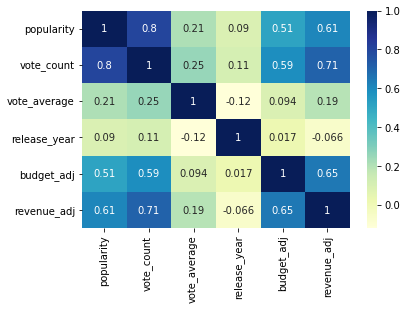

In [23]:
# looking the correlation between variables
corr = df.corr()
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap="YlGnBu")
plt.show()

Here we notice, the revenue is correleted with popularity, budget and vote count.

##### Does the budget have any impact on revenue?

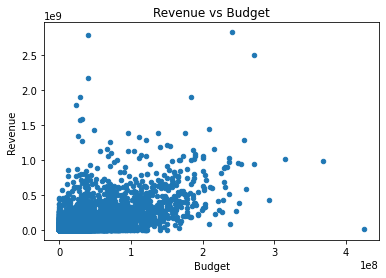

In [24]:
df.plot(kind='scatter', x = 'budget_adj', y = 'revenue_adj')
set_labels("Budget", "Revenue", "Revenue vs Budget")

There are few movies which have high revenue.

We can see from the scatterplot, it is clear that, there is dependency between revenue and  budget of movie. 

##### Does the popularity have any impact on revenue?

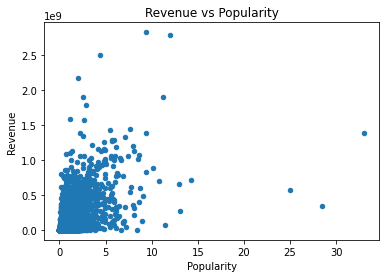

In [25]:
df.plot(kind='scatter', x = 'popularity', y = 'revenue_adj')
set_labels("Popularity", "Revenue", "Revenue vs Popularity")

We notice that, popularity has impact on revenue 

##### Does the vote_count have any impact on revenue?

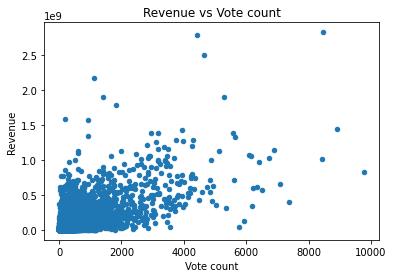

In [26]:
df.plot(kind='scatter', x = 'vote_count', y = 'revenue_adj')
set_labels("Vote count", "Revenue", "Revenue vs Vote count")

There is a positive correlation between revenue and vote_count.

##### Does the vote_average have any impact on revenue?

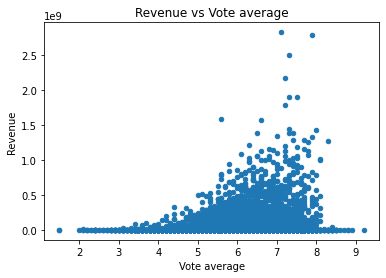

In [27]:
df.plot(kind='scatter', x = 'vote_average', y = 'revenue_adj')
set_labels("Vote average", "Revenue", "Revenue vs Vote average")

This plot (Revenue vs Vote average) shows that high revenue movies have voting average around 7.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

We notice that, movies with a vote around 7 have a very good revenue..

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

We notice a strong correlation between the revenue and budget, vote count, popularity.

### What is the genre of movie that has a very good revenue?

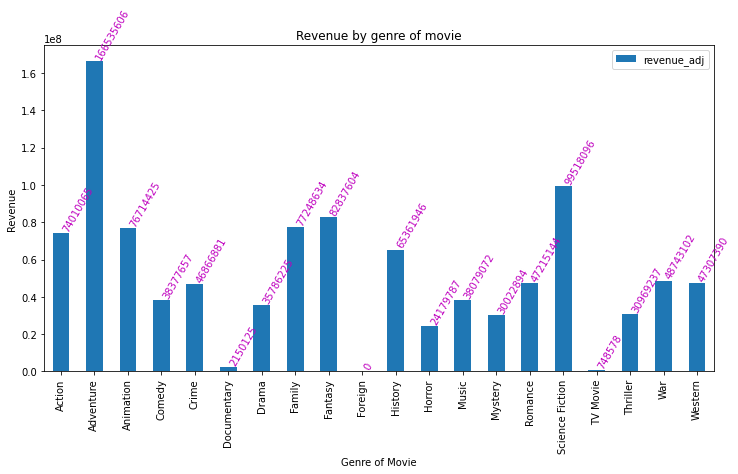

In [28]:
rev_by_genre = df.groupby('genre_movie')['revenue_adj'].mean()
plt.figure(figsize=(12, 6))
rev_by_genre.plot(kind='bar')
plt.legend()
for i, j in enumerate(rev_by_genre):
    plt.text(i ,j+300,  round(j), color='m', va ='bottom', rotation = 60) 
set_labels("Genre of Movie", "Revenue", "Revenue by genre of movie")

The adventure movie has a very good revenue

### what are the characteristics of the films that have a very good income?

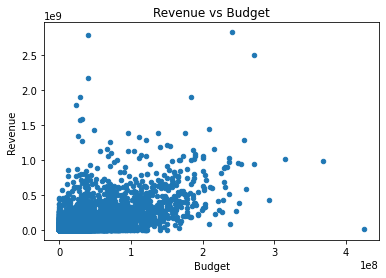

In [29]:
df.plot(kind='scatter', x = 'budget_adj', y = 'revenue_adj')
set_labels("Budget", "Revenue", "Revenue vs Budget")

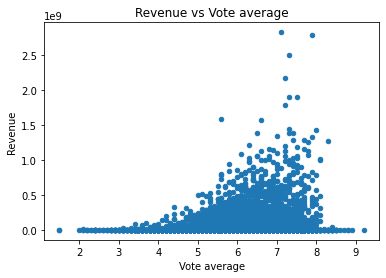

In [30]:
df.plot(kind='scatter', x = 'vote_average', y = 'revenue_adj')
set_labels("Vote average", "Revenue", "Revenue vs Vote average")

The films that have a very good revenue are films that have a vote around 7.

### Multivariate Exploration

In [31]:
budget_by_genre = df.groupby('genre_movie')['budget_adj'].mean()
rev_by_genre = df.groupby('genre_movie')['revenue_adj'].mean()
genre = df.groupby('genre_movie')['revenue_adj'].sum().index

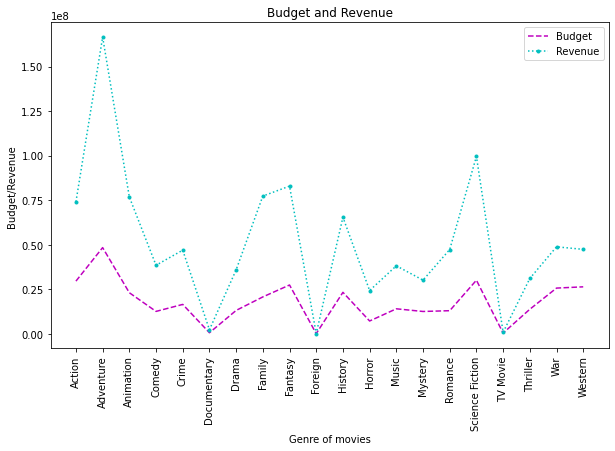

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(genre, budget_by_genre, "m--", label = "Budget")
plt.plot(genre, rev_by_genre, "c:.", label = "Revenue")
plt.xticks(genre, rotation = 90)
plt.legend()
set_labels("Genre of movies", "Budget/Revenue", "Budget and Revenue")

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
We find that budget has a positive impact on revenue

### Were there any interesting or surprising interactions between features?

No, i don't notice.

<a id='conclusions'></a>
## Conclusions
In this exploration we find:
* We notice that the votes are around 6
* We notice a strong correlation between the revenue and budget, vote count, popularity.
### Question 1
* The adventure movie has a good revenue
### Question 2
* The films that have a very good revenue are films that have a vote around 7 and have a big budget
### Limitations
* During our investigation of data, we find there are 23 missing values in genres (feature of interest) column.
    we deleted them but, this can lead to reduce statistical power and bias.